In [1]:
# import library

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3
from datetime import date, timedelta

# ignore warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# connect database

con = sqlite3.connect("olist.db")
cur = con.cursor()

In [3]:
# extract semua nama table

cur.execute("SELECT name FROM sqlite_master WHERE type = 'table';")
print(cur.fetchall())

[('olist_order_customer_dataset',), ('olist_order_dataset',), ('olist_order_reviews_dataset',), ('olist_order_payments_dataset',), ('olist_order_items_dataset',), ('olist_products_dataset',), ('olist_sellers_dataset',), ('olist_geolocation_dataset',), ('product_category_name_translation',)]


In [4]:
# convert table yang dibutuhkan menjadi pandas dataframes

df_order_payments_dataset = pd.read_sql("SELECT * FROM olist_order_payments_dataset", con)
df_order_items_dataset =pd.read_sql("SELECT * FROM olist_order_items_dataset", con)
df_products_dataset = pd.read_sql("SELECT * FROM olist_products_dataset", con)
df_product_category_name_translation = pd.read_sql("SELECT * FROM product_category_name_translation", con)

# df_order_customer_dataset = pd.read_sql("SELECT * FROM olist_order_customer_dataset", con)
# df_order_dataset =pd.read_sql("SELECT * FROM olist_order_dataset", con)
# df_order_reviews_dataset = pd.read_sql("SELECT * FROM olist_order_reviews_dataset", con)
# df_sellers_dataset =pd.read_sql("SELECT * FROM olist_sellers_dataset", con)
# df_geolocation_dataset = pd.read_sql("SELECT * FROM olist_geolocation_dataset", con)

In [5]:
# menggabungkan table yang dibutuhkan menjadi satu dataframes

df_olist = df_order_items_dataset.merge(df_order_payments_dataset, on = 'order_id', how = "outer").merge(df_products_dataset, on = "product_id", how = "outer").merge(df_product_category_name_translation, on = "product_category_name", how = "outer")
df_olist

,index_x,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,index_y,payment_sequential,...,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,index_y,product_category_name_english
0,0.0,00010242fe8c5a6d1ba2dd792cb16214,1.0,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,85283.0,1.0,...,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,22.0,cool_stuff
1,8346.0,130898c0987d1801452a8ed92a670612,1.0,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.90,17.96,39274.0,1.0,...,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,22.0,cool_stuff
2,36646.0,532ed5e14e24ae1f0d735b91524b98b9,1.0,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.90,18.33,87067.0,1.0,...,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,22.0,cool_stuff
3,49108.0,6f8c31653edb8c83e1a739408b5ff750,1.0,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.90,16.17,47987.0,1.0,...,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,22.0,cool_stuff
4,55021.0,7d19f4ef4d04461989632411b7e588b9,1.0,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.90,13.29,38405.0,1.0,...,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,22.0,cool_stuff
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118429,81651.0,b99217b1fcf2fdeace7b8d869b76cb91,1.0,57bdf3098169cccdb62221bd3e089cbd,d98eec89afa3380e14463da2aabaea72,2018-03-13 17:55:36,39.99,10.15,62723.0,1.0,...,fashion_roupa_infanto_juvenil,38.0,168.0,1.0,100.0,16.0,16.0,16.0,69.0,fashion_childrens_clothes
118430,82883.0,bc3ac768a8963f4ca68942ea6558fc9f,1.0,57bdf3098169cccdb62221bd3e089cbd,d98eec89afa3380e14463da2aabaea72,2018-03-28 03:09:01,39.99,6.43,49769.0,1.0,...,fashion_roupa_infanto_juvenil,38.0,168.0,1.0,100.0,16.0,16.0,16.0,69.0,fashion_childrens_clothes
118431,89240.0,cab08f0417a702d0f4782ec02356a4ac,1.0,8cfc3506cedc0626364457d254429118,dbb9b48c841a0e39e21f98e1a6b2ec3e,2017-10-09 04:28:12,89.99,17.07,94491.0,1.0,...,fashion_roupa_infanto_juvenil,47.0,327.0,3.0,300.0,30.0,20.0,20.0,69.0,fashion_childrens_clothes
118432,89524.0,cb53f0b6e8f9082a9f5a113765dd1236,1.0,8cfc3506cedc0626364457d254429118,dbb9b48c841a0e39e21f98e1a6b2ec3e,2018-06-11 22:50:09,89.99,7.49,44123.0,1.0,...,fashion_roupa_infanto_juvenil,47.0,327.0,3.0,300.0,30.0,20.0,20.0,69.0,fashion_childrens_clothes


In [6]:
# filter dan tampilkan kolom yang dibutuhkan

columns_used = ["order_id", "order_item_id", "product_id", "price", 
                "payment_type", "payment_value", "product_category_name_english"]

df_olist_filtered = df_olist[columns_used]
df_olist_filtered

,order_id,order_item_id,product_id,price,payment_type,payment_value,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1.0,4244733e06e7ecb4970a6e2683c13e61,58.90,credit_card,72.19,cool_stuff
1,130898c0987d1801452a8ed92a670612,1.0,4244733e06e7ecb4970a6e2683c13e61,55.90,boleto,73.86,cool_stuff
2,532ed5e14e24ae1f0d735b91524b98b9,1.0,4244733e06e7ecb4970a6e2683c13e61,64.90,credit_card,83.23,cool_stuff
3,6f8c31653edb8c83e1a739408b5ff750,1.0,4244733e06e7ecb4970a6e2683c13e61,58.90,credit_card,75.07,cool_stuff
4,7d19f4ef4d04461989632411b7e588b9,1.0,4244733e06e7ecb4970a6e2683c13e61,58.90,credit_card,72.19,cool_stuff
...,...,...,...,...,...,...,...
118429,b99217b1fcf2fdeace7b8d869b76cb91,1.0,57bdf3098169cccdb62221bd3e089cbd,39.99,credit_card,110.44,fashion_childrens_clothes
118430,bc3ac768a8963f4ca68942ea6558fc9f,1.0,57bdf3098169cccdb62221bd3e089cbd,39.99,boleto,106.43,fashion_childrens_clothes
118431,cab08f0417a702d0f4782ec02356a4ac,1.0,8cfc3506cedc0626364457d254429118,89.99,boleto,107.06,fashion_childrens_clothes
118432,cb53f0b6e8f9082a9f5a113765dd1236,1.0,8cfc3506cedc0626364457d254429118,89.99,credit_card,97.48,fashion_childrens_clothes


In [7]:
# dimensi dataset

rows, columns = df_olist_filtered.shape
print(f"Dataset terdiri dari {rows} baris dan {columns} kolom.")

Dataset terdiri dari 118434 baris dan 7 kolom.


## 1. Data Cleaning

### 1.1. Missing value handling

In [8]:
# general info tentang dataset

df_olist_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118434 entries, 0 to 118433
Data columns (total 7 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       118434 non-null  object 
 1   order_item_id                  117604 non-null  float64
 2   product_id                     117604 non-null  object 
 3   price                          117604 non-null  float64
 4   payment_type                   118431 non-null  object 
 5   payment_value                  118431 non-null  float64
 6   product_category_name_english  115881 non-null  object 
dtypes: float64(3), object(4)
memory usage: 7.2+ MB


In [9]:
# identifikasi missing values

df_olist_filtered.isna().sum() / len(df_olist_filtered) * 100

order_id                         0.000000
order_item_id                    0.700812
product_id                       0.700812
price                            0.700812
payment_type                     0.002533
payment_value                    0.002533
product_category_name_english    2.155631
dtype: float64

In [10]:
# menghilangkan baris yang terdapat missing value

df_olist_filtered.dropna(inplace=True)

In [11]:
# re-check missing values setelah drop data

df_olist_filtered.isna().sum()

order_id                         0
order_item_id                    0
product_id                       0
price                            0
payment_type                     0
payment_value                    0
product_category_name_english    0
dtype: int64

In [12]:
# dimensi dataset setelah drop missing value

rows, columns = df_olist_filtered.shape
print(f"Setelah drop missing value, dataset terdiri dari {rows} baris dan {columns} kolom.")

Setelah drop missing value, dataset terdiri dari 115878 baris dan 7 kolom.


### 1.2. Duplicate data handling

In [13]:
# duplicates check

df_olist_filtered[df_olist_filtered.duplicated(keep = False)]

,order_id,order_item_id,product_id,price,payment_type,payment_value,product_category_name_english
8,df2d910b8b5e5f461f67043489f9569d,1.0,4244733e06e7ecb4970a6e2683c13e61,55.90,voucher,20.0,cool_stuff
9,df2d910b8b5e5f461f67043489f9569d,1.0,4244733e06e7ecb4970a6e2683c13e61,55.90,voucher,20.0,cool_stuff
339,e5af3df04e781dc26254b1bec2563848,1.0,601a360bd2a916ecef0e88de72a6531a,129.99,voucher,20.0,cool_stuff
340,e5af3df04e781dc26254b1bec2563848,1.0,601a360bd2a916ecef0e88de72a6531a,129.99,voucher,20.0,cool_stuff
903,8ca5bdac5ebe8f2d6fc9171d5ebc906a,1.0,165f86fe8b799a708a20ee4ba125c289,169.99,voucher,15.0,cool_stuff
...,...,...,...,...,...,...,...
118029,8a8bd4a338e17ace44431e99a2add1d2,1.0,8ac47b3ab13c68f49f10dde899674149,83.99,voucher,20.0,dvds_blu_ray
118031,8a8bd4a338e17ace44431e99a2add1d2,1.0,8ac47b3ab13c68f49f10dde899674149,83.99,voucher,20.0,dvds_blu_ray
118032,8a8bd4a338e17ace44431e99a2add1d2,1.0,8ac47b3ab13c68f49f10dde899674149,83.99,voucher,20.0,dvds_blu_ray
118033,8a8bd4a338e17ace44431e99a2add1d2,1.0,8ac47b3ab13c68f49f10dde899674149,83.99,voucher,20.0,dvds_blu_ray


In [14]:
# jumlah data duplikat

n_duplikat = df_olist_filtered.duplicated().sum()
print(f"Terdapat {n_duplikat} data duplikat.")

Terdapat 657 data duplikat.


In [15]:
# keep first value

df_olist_filtered.drop_duplicates(keep = 'first', inplace = True)

In [16]:
# re-check duplikat setelah drop data

df_olist_filtered.duplicated().sum()

0

In [17]:
# dimensi dataset setelah drop duplicates

rows, columns = df_olist_filtered.shape
print(f"Setelah drop duplicates, dataset terdiri dari {rows} baris dan {columns} kolom.")

Setelah drop duplicates, dataset terdiri dari 115221 baris dan 7 kolom.


### 1.3. Inconsistent data handling

In [18]:
# check kolom order_item_id

df_olist_filtered['order_item_id'].unique()

array([ 1.,  2.,  4.,  3.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21.])

In [19]:
# check kolom price

df_olist_filtered['price'].unique()

array([ 58.9 ,  55.9 ,  64.9 , ..., 289.49, 139.05, 183.29])

In [20]:
# check kolom payment_type

df_olist_filtered['payment_type'].unique()

array(['credit_card', 'boleto', 'voucher', 'debit_card'], dtype=object)

In [21]:
# check kolom payment_value

df_olist_filtered['payment_value'].unique()

array([ 72.19,  73.86,  83.23, ..., 334.12, 160.83, 426.7 ])

Tidak terdapat inconsistent data pada dataset.

### 1.4. Outliers handling

In [22]:
# menampilkan statistika deskriptif

df_olist_filtered.describe().T

,count,mean,std,min,25%,50%,75%,max
order_item_id,115221.0,1.196336,0.700165,1.00,1.00,1.00,1.00,21.00
price,115221.0,120.905681,184.206014,0.85,39.90,74.90,134.90,6735.00
payment_value,115221.0,173.810937,268.634255,0.00,61.71,108.81,190.37,13664.08


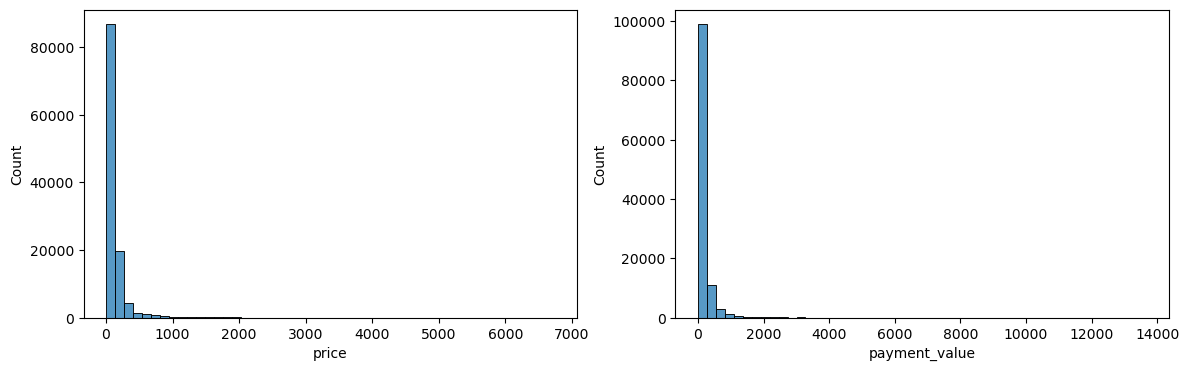

In [23]:
# identifikasi outliers pada kolom price dan payment_value

# membuat subplot 1 x 2
fig, ax = plt.subplots(ncols = 2, nrows = 1, figsize = (14, 4))

# subplot kolom price
sns.histplot(data = df_olist_filtered, x = 'price', bins = 50, ax = ax[0])

# subplot kolom payment_value
sns.histplot(data = df_olist_filtered, x = 'payment_value', bins = 50, ax = ax[1])

# menampilkan plot
plt.show()

In [24]:
# mencari nilai Q1 & Q3 untuk kolom price
Q1_price = df_olist_filtered.price.quantile(0.25)
Q3_price = df_olist_filtered.price.quantile(0.75)

print(f"Q1_price : {Q1_price:.2f}")
print(f"Q3_price : {Q3_price:.2f}")

Q1_price : 39.90
Q3_price : 134.90


In [25]:
# menghitung IQR & batas maksimum untuk kolom price
IQR_price = Q3_price - Q1_price
max_bound_price = Q3_price + 1.5 * IQR_price

print(f"IQR kolom price : {IQR_price:.2f}")
print(f"Maximum Boundary kolom price : {max_bound_price:.2f}")

IQR kolom price : 95.00
Maximum Boundary kolom price : 277.40


In [26]:
# mencari nilai Q1 & Q3 untuk kolom payment_value
Q1_payment = df_olist_filtered.payment_value.quantile(0.25)
Q3_payment = df_olist_filtered.payment_value.quantile(0.75)

print(f"Q1_payment : {Q1_payment:.2f}")
print(f"Q3_payment : {Q3_payment:.2f}")

Q1_payment : 61.71
Q3_payment : 190.37


In [27]:
# menghitung IQR & batas maksimum untuk kolom payment_value
IQR_payment = Q3_payment - Q1_payment
max_bound_payment = Q3_payment + 1.5 * IQR_payment

print(f"IQR kolom payment_value : {IQR_payment:.2f}")
print(f"Maximum Boundary kolom payment_value : {max_bound_payment:.2f}")

IQR kolom payment_value : 128.66
Maximum Boundary kolom payment_value : 383.36


In [28]:
# jumlah data outliers pada kolom price
n_outliers_price = df_olist_filtered[(df_olist_filtered['price'] > max_bound_price)].value_counts().sum()

# percentage outliers pada kolom price
percentage_outliers_price = n_outliers_price / df_olist_filtered.shape[0] * 100

print(f"Jumlah data outliers pada kolom price : {n_outliers_price} data.")
print(f"Percentage outliers pada kolom price : {percentage_outliers_price:.2f}%.")

Jumlah data outliers pada kolom price : 8691 data.
Percentage outliers pada kolom price : 7.54%.


In [29]:
# jumlah data outliers pada kolom payment_value
n_outliers_payment = df_olist_filtered[(df_olist_filtered['payment_value'] > max_bound_payment)].value_counts().sum()

# percentage outliers pada kolom payment_value
percentage_outliers_payment = n_outliers_payment / df_olist_filtered.shape[0] * 100

print(f"Jumlah data outliers pada kolom payment_value : {n_outliers_payment} data.")
print(f"Percentage outliers pada kolom payment_value : {percentage_outliers_payment:.2f}%.")

Jumlah data outliers pada kolom payment_value : 9324 data.
Percentage outliers pada kolom payment_value : 8.09%.


Percentage outliers lebih dari 5%, maka nilai outliers akan disubstitusi dengan nilai median pada masing-masing kolom.

In [30]:
# menghitung median
median_price = df_olist_filtered["price"].median()
median_payment = df_olist_filtered["payment_value"].median()

# substitusi nilai outliers dengan median
df_olist_filtered.loc[df_olist_filtered['price'] > max_bound_price, 'price'] = median_price
df_olist_filtered.loc[df_olist_filtered['payment_value'] > max_bound_payment, 'payment_value'] = median_payment

In [31]:
# re-check data outliers

n_outliers_price = df_olist_filtered[(df_olist_filtered['price'] > max_bound_price)].value_counts().sum()
n_outliers_payment = df_olist_filtered[(df_olist_filtered['payment_value'] > max_bound_payment)].value_counts().sum()

print(f"Data outliers price : {n_outliers_price}.")
print(f"Data outliers payment_value : {n_outliers_payment}.")

Data outliers price : 0.
Data outliers payment_value : 0.


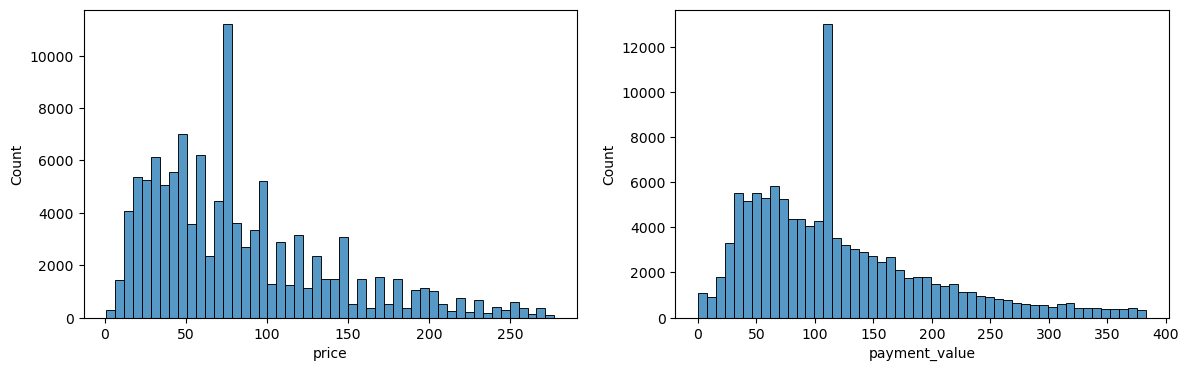

In [32]:
# plot setelah outliers handling

# membuat subplot 1 x 2
fig, ax = plt.subplots(ncols = 2, nrows = 1, figsize = (14, 4))

# subplot kolom price
sns.histplot(data = df_olist_filtered, x = 'price', bins = 50, ax = ax[0])

# subplot kolom payment_value
sns.histplot(data = df_olist_filtered, x = 'payment_value', bins = 50, ax = ax[1])

# menampilkan plot
plt.show()

## 2. Analisis Data

### 2.1. Mengetahui 5 produk dengan penjualan tertinggi

In [33]:
# aggregate order_item_id berdasarkan groupby product_category

top_products = df_olist_filtered.groupby('product_category_name_english').agg({'order_item_id':'sum'}).nlargest(5, 'order_item_id').reset_index()
top_products

,product_category_name_english,order_item_id
0,bed_bath_table,14399.0
1,furniture_decor,12009.0
2,health_beauty,11371.0
3,sports_leisure,10204.0
4,computers_accessories,10174.0


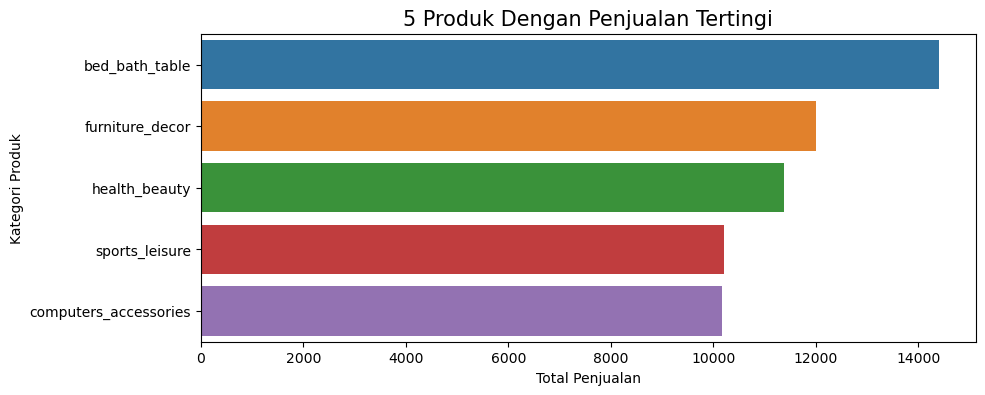

In [34]:
# visualisasi top_products

# membuat figure
plt.figure(figsize=(10, 4))

# membuat plot
sns.barplot(data = top_products, y = 'product_category_name_english', x = 'order_item_id')

# membuat nama judul plot
plt.title('5 Produk Dengan Penjualan Tertingi', fontsize= 15)

# membuat nama label x
plt.ylabel('Kategori Produk')

# membuat nama label y
plt.xlabel('Total Penjualan')

## menampilkan plot
plt.show()

### 2.2. Mengetahui 5 produk dengan revenue tertinggi

In [35]:
# aggregate payment_value berdasarkan groupby product_category

top_revenue = df_olist_filtered.groupby('product_category_name_english').agg({'payment_value':'sum'}).nlargest(5, 'payment_value').reset_index()
top_revenue

,product_category_name_english,payment_value
0,bed_bath_table,1436723.51
1,health_beauty,1185968.42
2,furniture_decor,1132484.82
3,sports_leisure,1087968.40
4,computers_accessories,989191.23


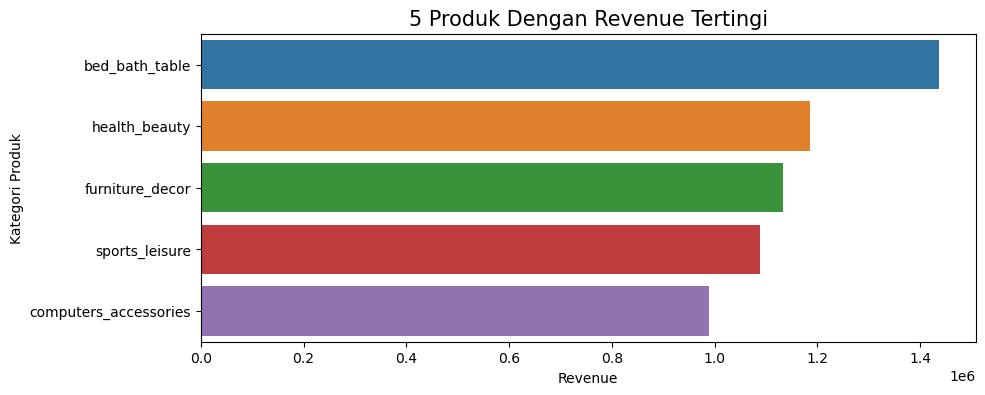

In [36]:
# visualisasi top_revenue

# membuat figure
plt.figure(figsize=(10, 4))

# membuat plot
sns.barplot(data = top_revenue, y = 'product_category_name_english', x = 'payment_value')

# membuat nama judul plot
plt.title('5 Produk Dengan Revenue Tertingi', fontsize= 15)

# membuat nama label x
plt.ylabel('Kategori Produk')

# membuat nama label y
plt.xlabel('Revenue')

## menampilkan plot
plt.show()

### 2.3. Metode pembayaran yang paling sering digunakan

In [37]:
top_payment_types = df_olist_filtered.groupby('payment_type').agg({'order_id':'count'}).nlargest(5, 'order_id').reset_index()
top_payment_types

,payment_type,order_id
0,credit_card,85500
1,boleto,22542
2,voucher,5521
3,debit_card,1658


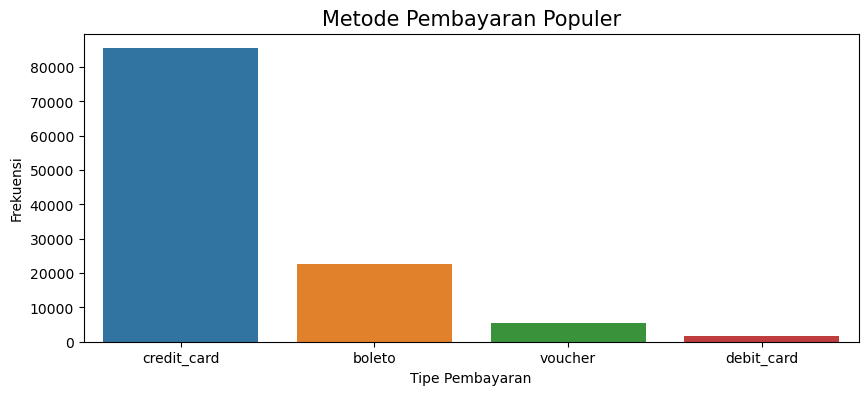

In [38]:
# visualisasi top_payment_types

# membuat figure
plt.figure(figsize=(10, 4))

# membuat plot
sns.barplot(data = top_payment_types, x = 'payment_type', y = 'order_id')

# membuat nama judul plot
plt.title('Metode Pembayaran Populer', fontsize= 15)

# membuat nama label x
plt.xlabel('Tipe Pembayaran')

# membuat nama label y
plt.ylabel('Frekuensi')

## menampilkan plot
plt.show()